      Name        Date    High     Low    Open   Close  Volume     Marketcap  \
0  Bitcoin  28-04-2013  135.98  132.10  135.30  134.21     0.0  1.488567e+09   
1  Bitcoin  29-04-2013  147.49  134.00  134.44  144.54     0.0  1.603769e+09   
2  Bitcoin  30-04-2013  146.93  134.05  144.00  139.00     0.0  1.542813e+09   
3  Bitcoin  01-05-2013  139.89  107.72  139.00  116.99     0.0  1.298955e+09   
4  Bitcoin  02-05-2013  125.60   92.28  116.38  105.21     0.0  1.168517e+09   

   Year  Average  
0  2013  134.040  
1  2013  140.745  
2  2013  140.490  
3  2013  123.805  
4  2013  108.940  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052325 entries, 0 to 1052324
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Name       1052325 non-null  object 
 1   Date       1052325 non-null  object 
 2   High       1052325 non-null  float64
 3   Low        1052325 non-null  float64
 4   Open       1052325 non-null  float6

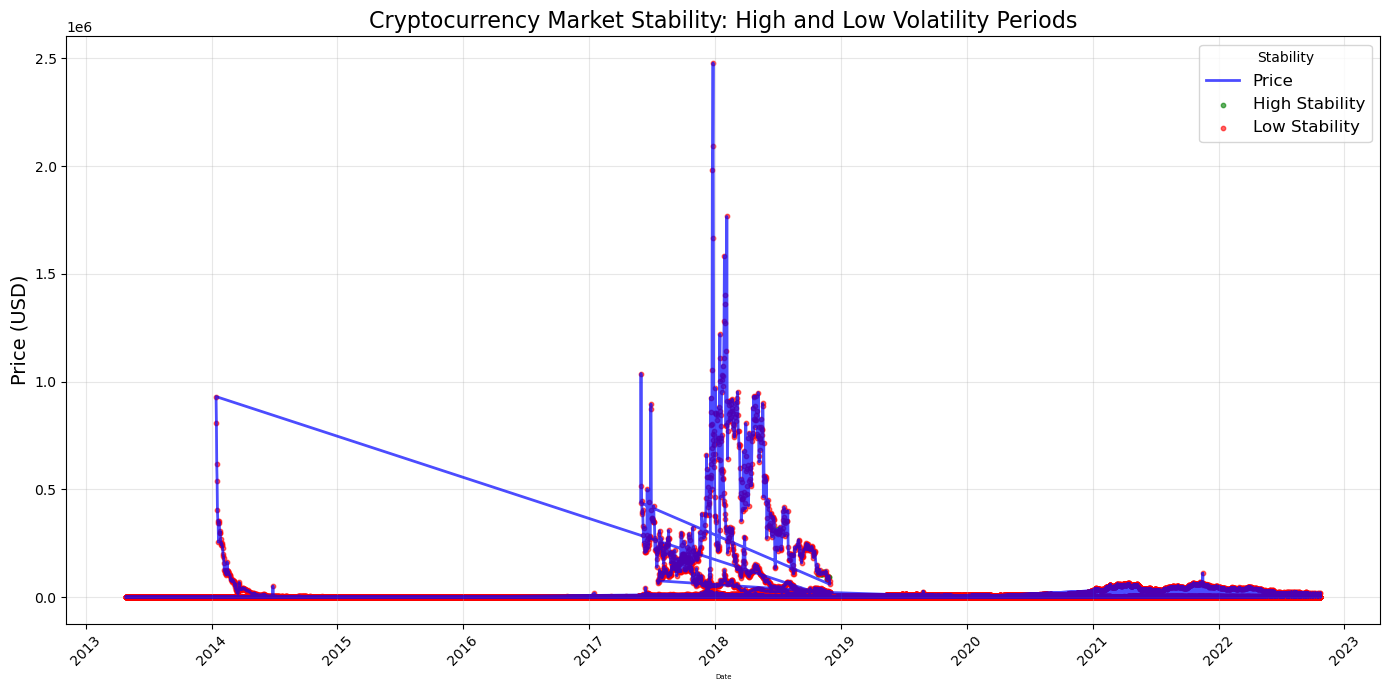

In [ ]:
import pandas as pd 
import numpy as np

df=pd.read_csv('Merged.csv')

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum(), 'no null values')

# Define stability based on the difference between High and Low prices
df['Volatility'] = df['High'] - df['Low']
volatility_threshold = df['Volatility'].median()
df['Stability'] = np.where(df['Volatility'] > volatility_threshold, 'Low Stability', 'High Stability')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

import matplotlib.pyplot as plt

# Plot historical price line
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Average'], label='Price', color='blue', linewidth=2, alpha=0.7)

# Highlight high stability periods
high_stability = df[df['Stability'] == 'High Stability']
plt.scatter(high_stability['Date'], high_stability['Average'], label='High Stability', color='green', s=10, alpha=0.6)

# Highlight low stability periods
low_stability = df[df['Stability'] == 'Low Stability']
plt.scatter(low_stability['Date'], low_stability['Average'], label='Low Stability', color='red', s=10, alpha=0.6)

# Add labels, title, and legend
plt.title('Cryptocurrency Market Stability: High and Low Volatility Periods', fontsize=16)
plt.xlabel('Date', fontsize=5)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(title='Stability', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
